# MAT 388, HW4

I worked with my friend Emre Özkaya on the last 2 question. So we may have some similar codes.

## Q1

For this question we are goint to use [CELEB_A](https://www.tensorflow.org/datasets/catalog/celeb_a) dataset through [tensorflow datasets](https://www.tensorflow.org/datasets).

1. Ingest the data, and select 10000 images from the dataset. Put the images under a variable called `X` and class labels (attributes) into `y`.
2. Build a neural network model for `X` against `Glasses` attribute in `y`.
3. Test the accuracy of your model using a 5-fold cross-validation. (I want a %95 confidence interval on the returned result using a t-test as I did in one of my lectures.)
4. Repeat Steps 2 and 3 for `Male` and `Bangs` attributes.
5. Compare your results for `Glasses`, `Male` and `Bangs`. Which one is better? Why? Explain.

In [185]:
import pandas as pd
import numpy as np
import tensorflow as tf

from keras.preprocessing import sequence 
from keras.datasets import imdb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Embedding 

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt

In [12]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd

In [19]:
ds = tfds.load('CELEB_A', split='train', shuffle_files=True)

In [25]:
X=[]
for i in tfds.as_numpy(ds['train'].take):
    X.append(i['image'])

TypeError: 'PrefetchDataset' object is not subscriptable

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,Y,test_size=0.2,random_state=42)

In [370]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=4,activation="relu"))
ann.add(tf.keras.layers.Dense(units=4,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
ann.fit(X_train,Y_train,batch_size=32,epochs = 10)

Epoch 1/10
94/94 [==============================] - 5s 3ms/step - loss: -26950.9004 - accuracy: 0.0000e+00
Epoch 2/10
94/94 [==============================] - 0s 3ms/step - loss: -180586.7031 - accuracy: 0.0000e+00
Epoch 3/10
94/94 [==============================] - 0s 3ms/step - loss: -448777.2812 - accuracy: 0.0000e+00
Epoch 4/10
94/94 [==============================] - 0s 3ms/step - loss: -870313.3125 - accuracy: 0.0000e+00
Epoch 5/10
94/94 [==============================] - 0s 3ms/step - loss: -1486388.2500 - accuracy: 0.0000e+00
Epoch 6/10
94/94 [==============================] - 0s 3ms/step - loss: -2339739.5000 - accuracy: 0.0000e+00
Epoch 7/10
94/94 [==============================] - 0s 3ms/step - loss: -3473628.5000 - accuracy: 0.0000e+00
Epoch 8/10
94/94 [==============================] - 0s 3ms/step - loss: -4928361.0000 - accuracy: 0.0000e+00
Epoch 9/10
94/94 [==============================] - 0s 3ms/step - loss: -6745060.5000 - accuracy: 0.0000e+00
Epoch 10/10
94/94 [=====

I pulled the data so late for that reason I couldn't do much work on this question

## Q2

For this question use the [Hyperspectral Image of Kennedy Space Center](https://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes#Kennedy_Space_Center_.28KSC.29).

1. Ingest the image data directly from the web. (No local files!)
2. Ingest the ground truth data directly from the web. (No local files!)
4. Build a convolutional neural network (preferably using [this](https://keras.io/api/layers/convolution_layers/) and/or [this](https://keras.io/api/layers/recurrent_layers/conv_lstm2d/)) model.
5. Test the accuracy of the model using a 5-fold cross-validation. (I want a %95 confidence interval on the returned result using a t-test as I did in one of my lectures.)

In [183]:
import requests
link = "http://www.ehu.es/ccwintco/uploads/2/26/KSC.mat"
f = requests.get(link)


ConnectionError: HTTPConnectionPool(host='www.ehu.es', port=80): Max retries exceeded with url: /ccwintco/uploads/2/26/KSC.mat (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000261FF01EEB0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

I couldn't pull the data

## Q3

For this question we are going to use the time series of [Wheat Futures](https://finance.yahoo.com/quote/ZW=F/) from Yahoo Finance.

1. Ingest the data using [yfinance](https://pypi.org/project/yfinance/) Start from Jan 1, 2010 until Dec 31, 2021.
2. Construct [a RNN and/or a LSTM](https://keras.io/api/layers/recurrent_layers/) model on the data.
3. Test your model on the wheat futures data from Jan 1, 2022 to today using a single fold cross-validation. Did your model work? Explain.

In [195]:
import numpy as np
import pandas as pd
import yfinance as yf

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [211]:
data = get_data("ZW=F", start_date = "01/01/2010", end_date = "31/12/2021", index_as_date = True, interval = "1d")
df_test = get_data("ZW=F", start_date = "31/12/2021", end_date ="18/12/2022", index_as_date = True, interval = "1d")
data = data.drop(['ticker'], axis=1)
data = data.dropna()


In [212]:
data

,open,high,low,close,adjclose,volume
2010-01-04,544.75,561.25,544.00,557.75,557.75,41278.0
2010-01-05,556.75,561.50,552.00,553.00,553.00,36720.0
2010-01-06,552.00,567.75,551.00,567.25,567.25,38503.0
2010-01-07,566.50,568.00,556.00,557.75,557.75,33873.0
2010-01-08,557.50,570.00,545.25,568.50,568.50,33873.0
...,...,...,...,...,...,...
2021-12-23,812.50,820.50,808.25,814.75,814.75,36615.0
2021-12-27,817.50,824.00,802.50,804.00,804.00,30210.0
2021-12-28,805.75,808.00,781.75,783.50,783.50,41877.0
2021-12-29,785.25,793.00,774.00,787.75,787.75,40941.0


I copied most of your lesson code and tried to understand. But I couldn't use the test data. I worked on just one data.

In [296]:
def load_data(data,T):
    N = data.shape[0]
    raw = data.to_numpy().reshape(N,1,)
    Y_train = raw[1:N-T]
    X_train = raw[:N-T-1]
    Y_test = raw[N-T:]
    X_test = raw[N-T-1:N-1]
    return X_train,X_test,Y_train,Y_test

In [360]:
X_train,X_test,Y_train,Y_test = load_data(data['close'],20)

In [361]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1,1)))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(1, activation = 'relu'))

model.compile(loss='mape', optimizer='adam', metrics = ['mse'])

In [366]:
model.fit(X_train,Y_train,epochs=10,batch_size=5,validation_data=(X_test,Y_test),verbose=1)

Epoch 1/10
600/600 [==============================] - 3s 5ms/step - loss: 17.8696 - mse: 19987.7305 - val_loss: 33.4361 - val_mse: 69881.0391
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 17.8293 - mse: 19667.8047 - val_loss: 34.0969 - val_mse: 72659.3281
Epoch 3/10
600/600 [==============================] - 4s 6ms/step - loss: 17.9490 - mse: 20120.4805 - val_loss: 34.1714 - val_mse: 72975.7734
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 17.9712 - mse: 19728.3027 - val_loss: 34.9803 - val_mse: 76457.6406
Epoch 5/10
600/600 [==============================] - 4s 6ms/step - loss: 17.8395 - mse: 19793.0508 - val_loss: 32.8157 - val_mse: 67322.4141
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 17.9810 - mse: 20260.8008 - val_loss: 33.4257 - val_mse: 69837.5859
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 17.8502 - mse: 20261.0117 - val_loss: 34.5422 - val_mse: 74561.5781
Epoch 

In [367]:
Y_pred = model.predict(X_test)
res = pd.DataFrame({'X_test': X_test.reshape(X_test.shape[0]), 
                    'Y_test': Y_test.reshape(Y_test.shape[0]), 
                    'Y_pred': Y_pred.reshape(Y_pred.shape[0])})
res

1/1 [==============================] - 0s 115ms/step


,X_test,Y_test,Y_pred
0,778.50,806.50,517.995789
1,806.50,794.50,517.995789
2,794.50,797.00,517.995789
3,797.00,799.25,517.995789
4,799.25,791.25,517.995789
5,791.25,773.50,517.995789
6,773.50,782.00,517.995789
7,782.00,785.50,517.995789
8,785.50,785.50,517.995789
9,785.50,756.00,517.995789


In [368]:
model.evaluate(X_test, Y_test, batch_size = 32) 

1/1 [==============================] - 0s 185ms/step - loss: 34.3125 - mse: 73577.4141


[34.312538146972656, 73577.4140625]

<AxesSubplot:>

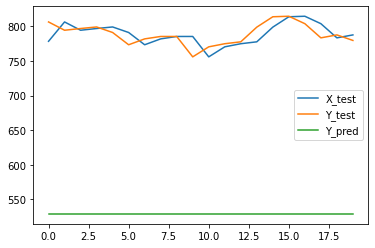

In [365]:
res.plot()

This can be the worst scenario for a neural network model. It is really bad. :(

## Q4

For this question, we are going to use [Consumer Complaints Dataset](https://raw.githubusercontent.com/plotly/datasets/master/26k-consumer-complaints.csv).

1. Ingest the dataset. We are only going to use the columns `Issue` and `Timely Response?`.
2. Convert the values in the issue column to vectors using [Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) from `scikit-learn`. Similarly, binarize the column `Timely Response` using [Label Binarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).
3. Split your dataset into train and test.
3. Construct an an appropriate neural network model on the train set.
4. Test your model on the test set. Did your model work? Explain.

In [163]:
import pandas as pd
url = "https://raw.githubusercontent.com/plotly/datasets/master/26k-consumer-complaints.csv"
df = pd.read_csv(url)

In [175]:
df_q4 = pd.DataFrame()
df_q4['Issue'] = df['Issue']
df_q4["Timely response?"] = df["Timely response?"]
df_q4 = df_q4.dropna()

In [373]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

vectorizer.fit(df_q4['Issue'])

X = vectorizer.transform(df_q4['Issue'])

In [182]:
from sklearn.preprocessing import LabelBinarizer

binarizer = LabelBinarizer()

binarizer.fit(df_q4['Timely response?'])

y = binarizer.transform(df_q4['Timely response?'])

In [371]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [372]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(y_train.shape[1], activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:',  test_acc)

Epoch 1/10
616/616 [==============================] - 9s 5ms/step - loss: 0.1178 - accuracy: 0.9753
Epoch 2/10
616/616 [==============================] - 2s 3ms/step - loss: 0.1037 - accuracy: 0.9754
Epoch 3/10
616/616 [==============================] - 2s 3ms/step - loss: 0.1025 - accuracy: 0.9754
Epoch 4/10
616/616 [==============================] - 3s 4ms/step - loss: 0.1019 - accuracy: 0.9754
Epoch 5/10
616/616 [==============================] - 2s 4ms/step - loss: 0.1020 - accuracy: 0.9754
Epoch 6/10
616/616 [==============================] - 2s 4ms/step - loss: 0.1018 - accuracy: 0.9754
Epoch 7/10
616/616 [==============================] - 2s 3ms/step - loss: 0.1010 - accuracy: 0.9754
Epoch 8/10
616/616 [==============================] - 3s 4ms/step - loss: 0.1021 - accuracy: 0.9754
Epoch 9/10
616/616 [==============================] - 3s 3ms/step - loss: 0.1015 - accuracy: 0.9754
Epoch 10/10
264/264 [==============================] - 1s 2ms/step - loss: 0.1127 - accuracy: 0.9731

Test accuracy is 97.31% so we can say it is a good working model: